In [ ]:
# for manupulations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity 
from ipywidgets import interact

In [ ]:
# read dataset
data = pd.read_excel('data.xlsx', engine='openpyxl')

In [ ]:
# check contents of dataset
print(data.shape)

(2200, 8)


In [ ]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
#checking null values
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
print(format(data['N'].mean()))
print(data['P'].mean())
print(data['K'].mean())
print(data['temperature'].mean())
print(data['humidity'].mean())

50.551818181818184
53.36272727272727
48.14909090909091
25.616243851779544
71.48177921778637


In [ ]:
# lets check the summary statictics of each of the crops

@interact 
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------------")
    print("statistics for introgen")
    print("min nitrogen required:",x['N'].min())
    print("Average nitrogen required:",x['N'].mean())
    print("Maximum nitrogen required:",x['N'].max())
    print("---------------------------------------------------")
    print("min phosphorous required:",x['P'].min())
    print("Average phosphorous required:",x['P'].mean())
    print("Maximum phosphorous required:",x['P'].max())
    print("---------------------------------------------------")
    print("min humidity required:",x['humidity'].min())
    print("Average humidity required:",x['humidity'].mean())
    print("Maximum humidity required:",x['humidity'].max())
    print("---------------------------------------------------")
    print("min ph required:",x['ph'].min())
    print("Average ph required:",x['ph'].mean())
    print("Maximum ph required:",x['ph'].max())
    print("---------------------------------------------------")
    print("min rainfall required:",x['rainfall'].min())
    print("Average rainfall required:",x['rainfall'].mean())
    print("Maximum rainfall required:",x['rainfall'].max())
    print("---------------------------------------------------")
    print("min potassium required:",x['K'].min())
    print("Average potassium required:",x['K'].mean())
    print("Maximum potassium required:",x['K'].max())
    print("---------------------------------------------------")
    print("min temperature required:",x['temperature'].min())
    print("Average temperature required:",x['temperature'].mean())
    print("Maximum temperature required:",x['temperature'].max())

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [ ]:
# summing up the whole thing
@interact
def compare(condition = ['N' , 'K' , 'P' , 'temperature' , 'ph' , 'humidity' , 'rainfall']):
    print("crops which require greater than average: ", condition)
    print(data[data[condition] > data[condition].mean()]['label'].unique())
    print("------------------------------------------------------")
    print("crops which require less than average: ",condition,'\n')
    print(data[data[condition] <= data[condition].mean()]['label'].unique())

interactive(children=(Dropdown(description='condition', options=('N', 'K', 'P', 'temperature', 'ph', 'humidity…

In [ ]:
@interact
def compare(condition = ['N' , 'K' , 'P' , 'temperature' , 'ph' , 'humidity' , 'rainfall']):
    print("average value for ", condition, "is: ", data[condition].mean())
    print("rice: ", data[data['label'] == 'rice'][condition].mean())

interactive(children=(Dropdown(description='condition', options=('N', 'K', 'P', 'temperature', 'ph', 'humidity…

In [ ]:
#some interesting patterns
print("patterns:")
print("high nitrogen:", data[data['N'] > 120]['label'].unique())
print("high phosporous:", data[data['P'] > 100]['label'].unique())
print("high Potassium:", data[data['K'] > 200]['label'].unique())
print("high temperature:", data[data['temperature'] > 40]['label'].unique())
print("Low temperature:", data[data['N'] < 10]['label'].unique())

patterns:
high nitrogen: ['cotton']
high phosporous: ['grapes' 'apple']
high Potassium: ['grapes' 'apple']
high temperature: ['grapes' 'papaya']
Low temperature: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'lentil' 'pomegranate'
 'mango' 'grapes' 'apple' 'orange' 'coconut']


In [ ]:
# lets understand which crop can be grown in summer season
print("crops grown in summer season")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("---------------------------------------------------------------------------")
print("winter crop")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------------------------------------------")
print("Rainy crop")
print(data[(data['rainfall'] >200)  & (data['humidity'] > 30)]['label'].unique())

crops grown in summer season
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------------------------------
winter crop
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------------------------------
Rainy crop
['rice' 'papaya' 'coconut']


In [ ]:
#clustering analysis
#using k Means clustering analysis
#using sk learn library import karne ka
from sklearn.cluster import KMeans

#removing the labels columnn
x = data.drop(['label'], axis= 1)  #as we dont require labels for unsupervised learning
x = x.values

#checking shapes
print(x.shape)

(2200, 7)


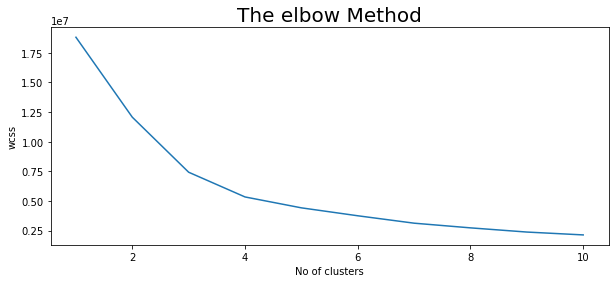

In [ ]:
# preparing elbow chart to determine no. of clusters for kmeans

plt.rcParams['figure.figsize'] = (10,4)

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter=300 , n_init=10 , random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

    #plotting the results
plt.plot(range(1 , 11), wcss)
plt.title("The elbow Method", fontsize=20)
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [ ]:
#implementing kmeans 
km = KMeans(n_clusters = 4, init= 'k-means++', max_iter=300 , n_init=10 , random_state=0)
y_means = km.fit_predict(x)


#calculating the results
a = data['label']
y_means= pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

#lets check the cluster of each crops
print("first cluster: ", z[z['cluster'] == 0]['label'].unique())
print("second cluster: ", z[z['cluster'] == 1]['label'].unique())
print("third cluster: ", z[z['cluster'] == 2]['label'].unique())
print("fourth cluster: ", z[z['cluster'] == 3]['label'].unique())

first cluster:  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
second cluster:  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
third cluster:  ['grapes' 'apple']
fourth cluster:  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [ ]:
#logistic regression 

#storing labels in y and other dataset in x  so our models will not cheat

y = data['label']
x = data.drop(['label'],axis=1)

print("shape of x:", x.shape)
print("shape of y", y.shape)

shape of x: (2200, 7)
shape of y (2200,)


In [ ]:
# creating training and testing for validation of results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(x,y, test_size =0.2,random_state=0)  #training and testing (20:80) ratio

print("x training:", x_train.shape)
print("x testing:", x_test.shape)
print("y training:", y_train.shape)
print("y testing:", y_test.shape)

x training: (1760, 7)
x testing: (440, 7)
y training: (1760,)
y testing: (440,)


In [ ]:
# creating machine learning predictive model  (using logistic regression module)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear',max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

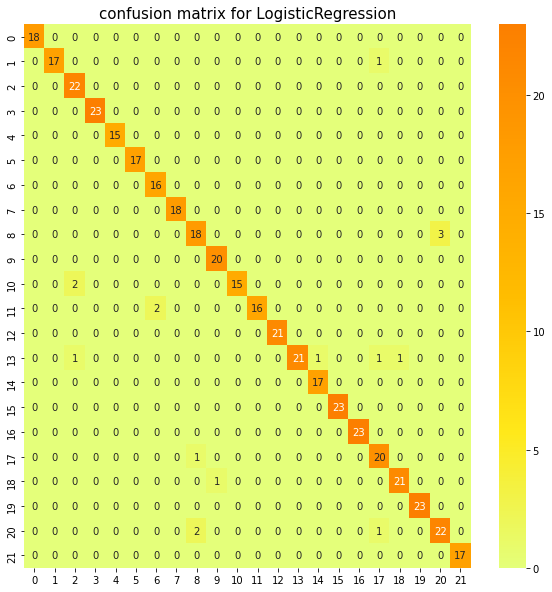

In [ ]:
#checking accruacy of our model
from sklearn.metrics import confusion_matrix

#printing confusion matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title("confusion matrix for LogisticRegression", fontsize=15)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [ ]:
#predicting the values of the given input
a= input("Enter Nitrogen value:")
b= input("Enter Phosphorous value:")
c= input("Enter Potassium Value:")
d= input("Enter Temperature value:")
e=input("Enter Humidity value:")
f=input("Enter Ph value:")
g=input("Enter Rainfall Amount:")
prediction = model.predict((np.array([[a,b,c,d,e,f,g]])))
print("The climatic condition of the given values is", prediction)

Enter Nitrogen value:60
Enter Phosphorous value:20
Enter Potassium Value:50
Enter Temperature value:10
Enter Humidity value:30
Enter Ph value:5
Enter Rainfall Amount:300
The climatic condition of the given values is ['coffee']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


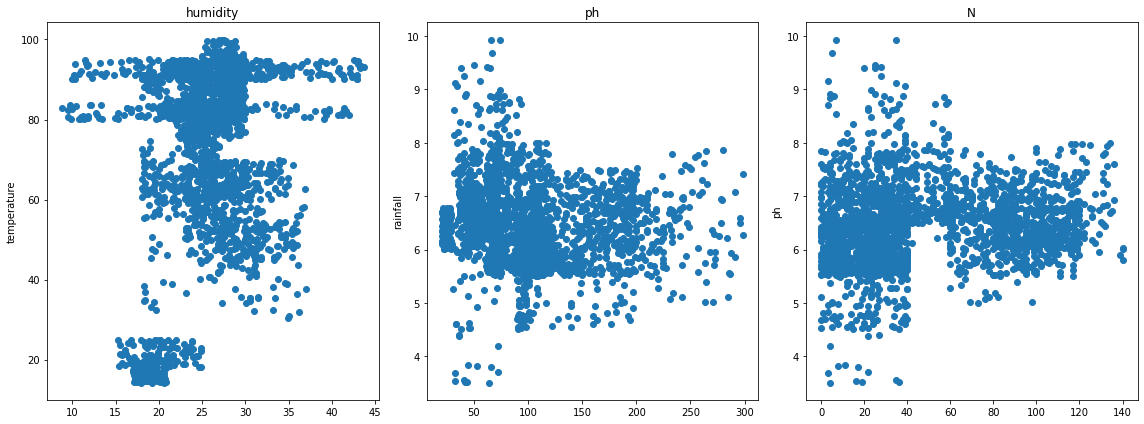

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(data['temperature'],data['humidity'],'o')
axes[0].set_ylabel("temperature")
axes[0].set_title("humidity")

axes[1].plot(data['rainfall'],data['ph'],'o')
axes[1].set_ylabel("rainfall")
axes[1].set_title("ph")

axes[2].plot(data['N'],data['ph'],'o')
axes[2].set_ylabel("ph")
axes[2].set_title("N")
plt.tight_layout()

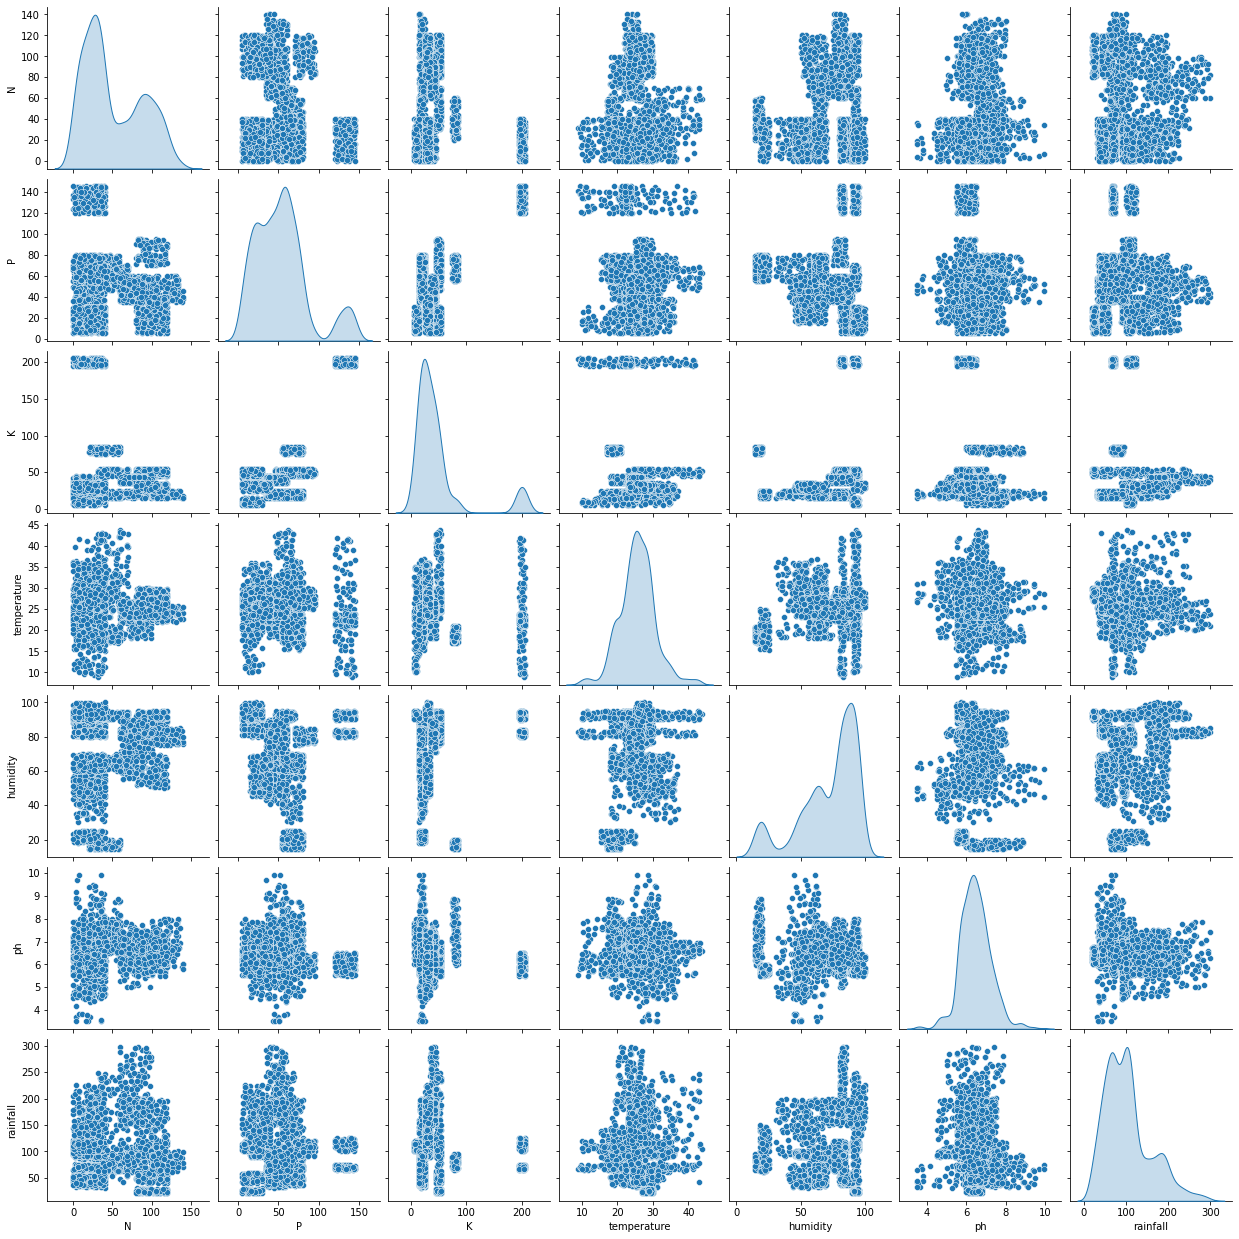

In [ ]:
sns.pairplot(data,diag_kind='kde')

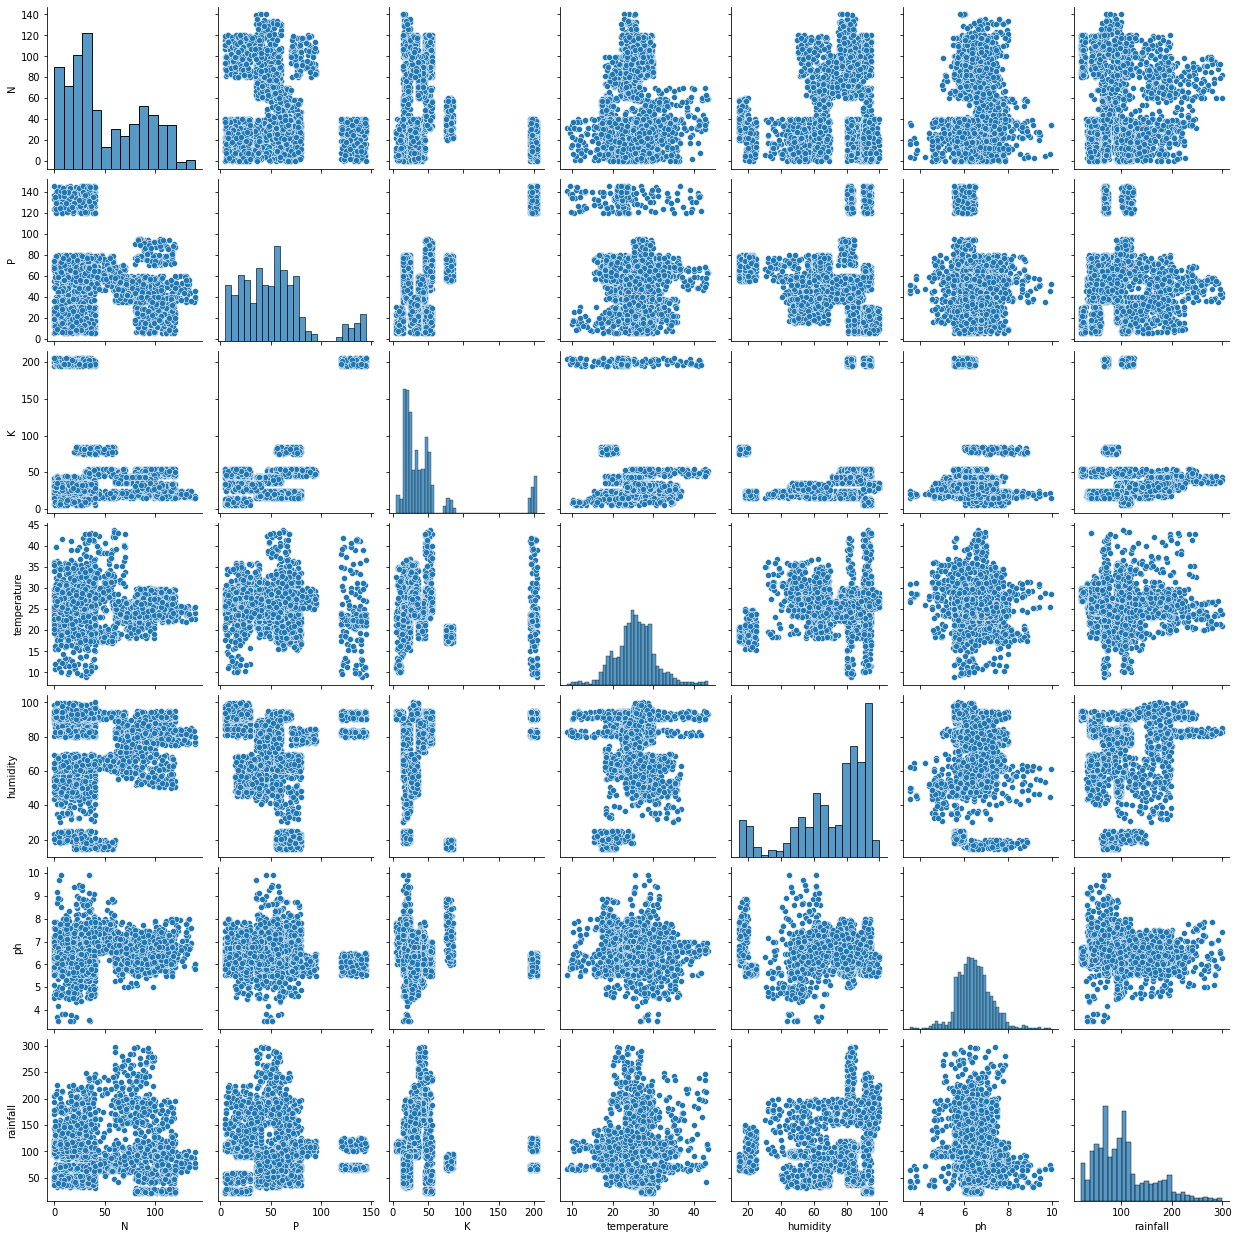

In [ ]:
sns.pairplot(data)